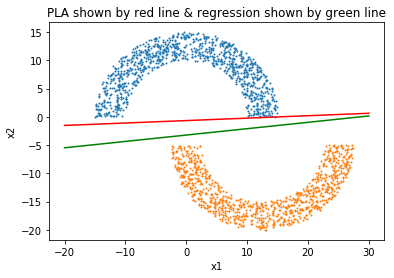

In [2]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

def generateData(ds,rad,sep,thk):
    top = []
    bottom = []
    count = 1
    r1 = rad+thk
    r2 = rad
    while(ds>=count):
        x1 = random.uniform(-r1,+r1);
        x2 = random.uniform(-r1,+r1);
        distance = math.sqrt(x1**2 + x2**2)
        if(distance >=r2 and distance <= r1):
            if(x2<0):
                temp = []
                temp.append(rad+thk/2+x1)
                temp.append(-sep+x2)
                bottom.append(temp)
                count+=1
            else:
                temp = []
                temp.append(x1)
                temp.append(x2)
                top.append(temp)
                count+=1
        else:
            continue
    return top,bottom

def perceptron(top,bottom,ds):
    W = [0.0,0.0,0.0]
    X=[]
    Y=[]
    i=0
    ds1=ds
    #convert top and bottom array to X and Y
    for i in range (len(top)):
        Xrow = []
        Xrow.append(top[i][0])
        Xrow.append(top[i][1])
        X.append(Xrow)
        Y.append(1)
    for i in range (len(bottom)):
        Xrow = []
        Xrow.append(bottom[i][0])
        Xrow.append(bottom[i][1])
        X.append(Xrow)
        Y.append(-1)
    while(ds1>=1):
        if((W[0]+W[1]*X[i][0]+W[2]*X[i][1])>=0 and Y[i] == -1):
            W[0] = W[0]-1
            W[1] = W[1]-X[i][0]
            W[2] = W[2]-X[i][1]
            ds1 = ds
            i=0
        elif((W[0]+W[1]*X[i][0]+W[2]*X[i][1])<0 and Y[i] == 1):
            W[0] = W[0]+1
            W[1] = W[1]+X[i][0]
            W[2] = W[2]+X[i][1]
            ds1 = ds
            i=0
        else:
            ds1=ds1-1
            i = i+1    
    return W

def regression(top,bottom):
    #convert top and bottom array to X and Y
    X = []
    Y = []
    for i in range (len(top)):
        Xrow = []
        Xrow.append(1)
        Xrow.append(top[i][0])
        Xrow.append(top[i][1])
        X.append(Xrow)
        Y.append(1)
    for i in range (len(bottom)):
        Xrow = []
        Xrow.append(1)
        Xrow.append(bottom[i][0])
        Xrow.append(bottom[i][1])
        X.append(Xrow)
        Y.append(-1)
    X = np.array(X)
    Y = np.array(Y)
    X_t = np.transpose(X)
    X_t_inverse = np.linalg.inv(np.matmul(X_t,X))
    X_final = np.matmul(X_t_inverse, X_t)
    W_reg = np.matmul(X_final,Y)
    return W_reg    

dataset = 2000
rad = 10
sep = 5
thk = 5
top,bottom= generateData(dataset,rad,sep,thk)
W_pla = perceptron(top,bottom,dataset)
W_reg = regression(top,bottom)
X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1, s=1)
plt.scatter(X2,Y2, s=1)

gx_pla = np.linspace(-20,30)
if(W_pla[2] != 0):
    plt.plot(gx_pla,-1*(((W_pla[1]/W_pla[2])*gx_pla)+ (W_pla[0]/W_pla[2])),'-r')
else:
    plt.plot(gx_pla,(-W_pla[0]/W_pla[1]),'-r')

gx_reg = np.linspace(-20,30)
if(W_pla[2] != 0):
    plt.plot(gx_reg,-1*(((W_reg[1]/W_reg[2])*gx_reg)+ (W_reg[0]/W_reg[2])),'-g')
else:
    plt.plot(gx_reg,(-W_reg[0]/W_reg[1]),'-g')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('PLA shown by red line & regression shown by green line')

plt.show()